# ***PAPER FIGURES***

In [19]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import pickle
% matplotlib inline

## Global Params

In [20]:
tick_lsize = 8
tick_width = 1
tick_length = 8
label_fsize = 12
line_width = 1
legend_fsize = 12

## All data needed to reproduce and adjust the figures is loaded below

In [21]:
with open(r"ICLR_Figure_Data.p", "rb") as input_file:
    PlotData = pickle.load(input_file)#, encoding='latin1')

# 1.- _LORENZ FIGURES_

## Create Variables for Lorenz Figures

In [22]:
KStepGfLDS_Lorenz = PlotData['KStepGfLDS_Lorenz']
KStepVIND_Lorenz  = PlotData['KStepVIND_Lorenz']
LorenzViz = PlotData['LorenzViz']
LorenzDim = PlotData['LorenzDim']

# Some hack for forcing the first element to start at 1
append = np.zeros(len(LorenzDim))
LB = np.zeros([len(LorenzDim)+1,2])
LB[1:,0]  = LorenzDim
LB[1:,1]  = append
LB[0] = np.array([0,0])
# Indicies
indicies = [1,2,3,4,5,6,7,8]
indicies = [1,3,5,7]

/Users/antoniomoretti/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


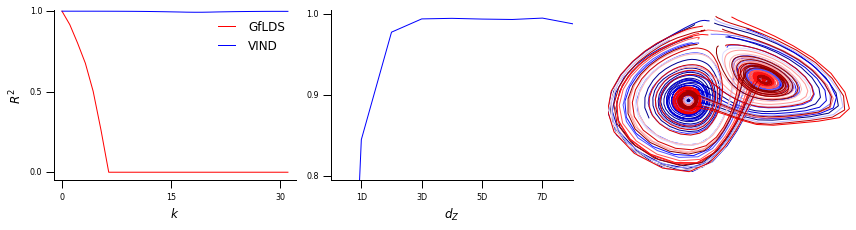

In [23]:
fig = plt.figure(figsize=(12, 3.3))


# SUBPLOT 1
plt.subplot(1,3,1)

plt.xlabel('$k$', fontsize=label_fsize)
plt.ylabel(r'$R^2$', fontsize=label_fsize)
plt.ylim(-0.05, 1.01)
plt.xlim(-1, 30)
plt.xticks(np.arange(0, 31, step=14), ('0', '15', '30'))
plt.yticks(np.arange(0, 1.1, step=.5), ('0.0', '0.5', '1.0'))
plt.tick_params(axis='both', which='major', labelsize=tick_lsize)
plt.tick_params(direction='out', length=8, width=1)

plt.plot(KStepGfLDS_Lorenz[0:30], '-', c='r', linewidth=line_width)
plt.plot(KStepVIND_Lorenz[0:30],'-', c='b', linewidth=line_width)
plt.legend(['GfLDS', 'VIND'], loc='best', fontsize=legend_fsize, frameon=False)


# SUBPLOT 2
plt.subplot(1,3,2)

plt.ylim(0.8,1.01)
plt.xlabel('$d_Z$', fontsize=label_fsize)
plt.xticks(indicies, ('1D', '3D', '5D',  '7D'))
plt.yticks(np.arange(.805, 1.1, step=.1), ('0.8', '0.9', '1.0'))
plt.tick_params(axis='both', which='major', labelsize=tick_lsize)
plt.tick_params(direction='out', length=tick_length, width=tick_width)

plt.plot(LB, "-", color='b', linewidth=line_width)
sns.despine()


# SUBPLOT 3
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.patch.set_visible(False)

NUM_COLORS = 30
cm = plt.get_cmap('seismic')
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for p in range(30):
    ax = fig.gca(projection='3d')
    ax.plot(LorenzViz[p,:,1], LorenzViz[p,:, 2], LorenzViz[p,:,0], linewidth=1)
    ax.axis('off')
    ax.grid(False)

# Adjust limits to enlarge paths
ax.set_ylim3d(-90, -10)
ax.set_xlim3d(5, 58)
ax.set_zlim3d(-50, 10)

plt.tight_layout()
plt.savefig("ICLR Lorenz 1", bbox_inches="tight")
plt.show()

# 2.- _ALLEN FIGURES_ 

## Create Variables for Allen Figures

In [24]:
KStepGfLDS_Allen = PlotData['KStepGfLDS_Allen']
KStepVIND_Allen  = PlotData['KStepVIND_Allen']
AllenDim = PlotData['AllenDim']
AllenYtrain = PlotData['AllenYtrain']
AllenYvalid = PlotData['AllenYvalid']
# Some hack for forcing the first element to start at 1
append = np.zeros(len(AllenDim))
AB = np.zeros([len(AllenDim)+1,2])
AB[1:,0] = AllenDim
AB[1:,1] = append
AB[0] = np.array([0,0])

In [25]:
AllenDataVisTrain = PlotData['AllenDataVisTrain']
AllenDataVisValid = PlotData['AllenDataVisValid']
YhatAllen_VIND = PlotData['YhatAllen_VIND']
YhatAllen_GfLDS = PlotData['YhatAllen_GfLDS']
YhatAllen = PlotData['YhatAllen']
AllenData3DPlot = PlotData['AllenData3DPlot']

In [135]:
AllenError = np.array([[0.1240, 0.1224, 0.1247], [0.0414, 0.1076, 0.1216], 
                       [0.0370, 0.0474, 0.0631], [0.0220, 0.0424, 0.0357],
                       [0.0295, 0.0629, 0.0638], [0.0378, 0.0434, 0.0448], 
                       [0.0325, 0.0351, 0.0356]])

In [152]:
AllenSD =   np.array([np.std(i) for i in AllenError])
AllenMax =  np.array([np.max(i) for i in AllenError])
AllenMin =  np.array([np.min(i) for i in AllenError])
AllenRange = AllenMax - AllenMin

## First Allen Triplet

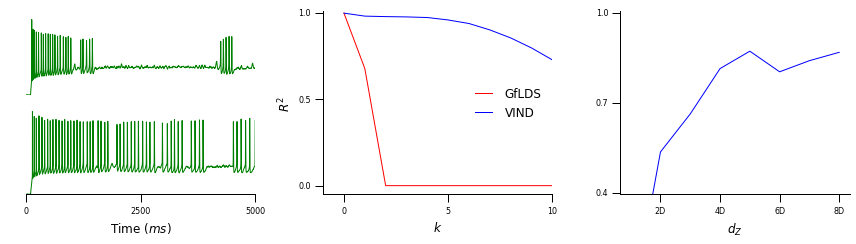

In [154]:
fig = plt.figure(figsize=(12, 3.5))
gs1 = gridspec.GridSpec(2, 6)


# SUBPLOT 1
ax1 = plt.subplot(gs1[0, 0:2])

ax1.axes.get_xaxis().set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.axis('off')

ax1.plot(AllenYtrain[23], c='green')


# SUBPLOT 2
ax2 = plt.subplot(gs1[1, 0:2])

plt.xticks([0,2500,5000], ('0', '2500', '5000'))
plt.yticks([])
plt.tick_params(axis='both', which='major', labelsize=tick_lsize)
plt.tick_params(axis='both', which='minor', labelsize=tick_lsize)
plt.tick_params(direction='out', length=tick_length, width=tick_width)
plt.xlabel('Time $(ms)$', fontsize=label_fsize)
plt.xlim(-1, 5000)

# ax2.xaxis.set_visible(False)
ax2.plot(AllenYtrain[21],c='green')
sns.despine(ax=ax2, left=True)

# SUBPLOT 3
ax3 = plt.subplot(gs1[0:2, 2:4])

plt.xlabel('$k$', fontsize=label_fsize)
plt.ylabel(r'$R^2$', fontsize=label_fsize)
plt.ylim(-0.05, 1.01)
plt.xlim(-1, 10)
plt.xticks(np.arange(0, 11, step=5), ('0', '5', '10'))
plt.yticks(np.arange(0, 1.1, step=.5), ('0.0', '0.5', '1.0'))
plt.tick_params(axis='both', which='major', labelsize=tick_lsize)
plt.tick_params(direction='out', length=tick_length, width=tick_width)

plt.plot(KStepGfLDS_Allen, '-', c='r', linewidth=line_width)
plt.plot(KStepVIND_Allen,'-', c='b', linewidth=line_width)
plt.legend(['GfLDS', 'VIND'], loc='best', fontsize=legend_fsize, frameon=False)
sns.despine(ax=ax3)

# SUBPLOT 4
ax4 = plt.subplot(gs1[0:2, 4:6])

plt.ylim(0.4, 1.01)
plt.xlabel('$d_Z$', fontsize=label_fsize)
plt.xticks(indicies, ('2D', '4D', '6D',  '8D'))
plt.yticks(np.arange(.405, 1.1, step=.3), ('0.4', '0.7', '1.0'))
plt.tick_params(axis='both', which='major', labelsize=tick_lsize)
plt.tick_params(direction='out', length=tick_length, width=tick_width)

plt.plot(AB, "-", color='b', linewidth=line_width)
plt.scatter(np.arange(0,8,1), AB[:,0], marker='|', s=AllenRange)
#plt.errorbar(indicies, AB, yerr=AllenSD, fmt='-o')
sns.despine(ax=ax4)

plt.tight_layout()
plt.savefig("ICLR Allen 1 ErrorBars", bbox_inches="tight")

## Second Allen Triplet

### Params for second Allen figure.

Rotate the third subplot by specifying angles theta, phi

In [16]:
def find_contiguous_colors(colors):
    # finds the continuous segments of colors and returns those segments
    segs = []
    curr_seg = []
    prev_color = ''
    for c in colors:
        if c == prev_color or prev_color == '':
            curr_seg.append(c)
        else:
            segs.append(curr_seg)
            curr_seg = []
            curr_seg.append(c)
        prev_color = c
    segs.append(curr_seg) # the final one
    return segs
 
def plot_multicolored_lines(x,y,colors):
    segments = find_contiguous_colors(colors)
    #plt.figure()
    #plt.grid(True)
    start= 0
    for seg in segments:
        end = start + len(seg)
        l, = plt.gca().plot(x[start:end],y[start:end],lw=1,c=seg[0]) 
        start = end
    plt.xlim([1100,5000])

In [140]:
# Trial to plot
trial = 6
c1 = 'crimson'
c2 = 'navy'
# For 3D Plot
p = 22 # Trial to plot in 3D
dim1 = 1
dim2 = 2
dim3 = 3
trim = 1000 # How much of the time series to remove?
s  = 100 + trim
s1 = 100 + trim
# For coloring
s1a = 1325 # 1325
s1b = 1528 # 1515
s2a = 1727 # 1727
s2b = 2104 # 2105
s3a = 2680 # 2680
s3b = 3112 # 3105
s4a = 3498 # 3498
s4b = 4012 # 4001
s5a = 4182 # 4182
s5b = 5000
tidx = 5000
theta, phi = 30, -150 # Angles to rotate 3D image
X_passed = AllenData3DPlot

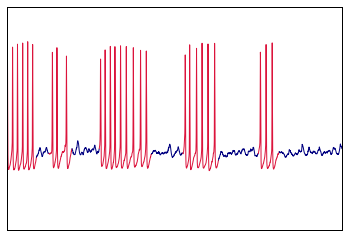

In [141]:
colors = [c1]*(5000)
colors[1350:1500] = [c2]*150
colors[1775:2100] = [c2]*325
colors[2725:3100] = [c2]*375
colors[3525:4000] = [c2]*475
colors[4250:5000] = [c2]*750


myx = np.arange(0,5000,1)
myx.shape, AllenYtrain[22,:,0].shape
myx.shape
AllenYtrain[22,:,0].shape
plot_multicolored_lines(myx,AllenYtrain[22,:,0], colors)
plt.xlim([trim,5000])
plt.xticks([])
plt.yticks([])
#sns.despine()
plt.savefig("Voltage Trace for Allen 3D")

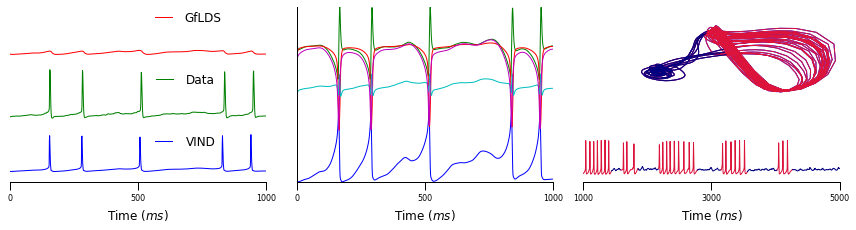

In [147]:
plt.figure(figsize=(12, 3.3))
gs1 = gridspec.GridSpec(3, 9)

# SUBPLOT 1
ax0 = plt.subplot(gs1[0, 0:3])
plt.ylim(-4,2)
plt.yticks([])
plt.xticks([])
plt.tick_params(axis='both', which='major', labelsize=tick_lsize)
plt.tick_params(direction='out', length=tick_length, width=tick_width)
ax0.axis('off')
l1 = ax0.plot(YhatAllen_GfLDS[trial,1000:2000,:], color = 'red')
plt.legend(['GfLDS'], bbox_to_anchor=(0.02, 1.02, 0.85, .102), fontsize=legend_fsize, frameon=False)

# SUBPLOT 2
ax1 = plt.subplot(gs1[1, 0:3])
plt.ylim(-4, 2)
plt.yticks([])
plt.xticks([])
plt.tick_params(axis='both', which='major', labelsize=tick_lsize)
plt.tick_params(direction='out', length=tick_length, width=tick_width)
ax1.axis('off')
l2 = ax1.plot(YhatAllen[trial,1010:2000,:], '-', color='green')
plt.legend(['Data'], bbox_to_anchor=(0.02, 1.02, 0.825, .102), fontsize=legend_fsize, frameon=False)

# SUBPLOT 3
ax2 = plt.subplot(gs1[2, 0:3])
plt.ylim(-5, 2)
plt.yticks([])
plt.xticks([0, 500, 1000], ('0', '500', '1000'))
plt.tick_params(axis='both', which='major', labelsize=tick_lsize)
plt.tick_params(direction='out', length=tick_length, width=tick_width)
l3 = ax2.plot(YhatAllen_VIND[trial,1000:2000,:], color = 'blue')
plt.legend(['VIND'], bbox_to_anchor=(0.02, 1.02, 0.825, .102), fontsize=legend_fsize, frameon=False)
plt.xlim([0,1000])
sns.despine(ax=ax2, left=True)

plt.xlabel('Time $(ms)$', fontsize=label_fsize)
# plt.legend([l1, l2, l3], ['GfLDS', 'VIND', 'Blah'], loc='best', fontsize=legend_fsize, frameon=False)

# SUBPLOT 4
ax4 = plt.subplot(gs1[0:3, 3:6])

plt.yticks([])
plt.xticks([0,500,1000], ('0', '500', '1000'))
plt.tick_params(axis='both', which='major', labelsize=tick_lsize)
plt.tick_params(direction='out', length=tick_length, width=tick_width)
sns.despine(ax=ax4)
plt.plot(AllenDataVisValid[trial,1000:2000])
plt.xlabel('Time $(ms)$', fontsize=label_fsize)
plt.xlim(0, 1000)

# SUBPLOT 5
ax5 = plt.subplot(gs1[0:2, 6:9], projection='3d')

ax5.plot(-X_passed[p,s:tidx,dim1],X_passed[p,s:tidx,dim2],-X_passed[p,s:tidx,dim3])
ax5.view_init(theta, phi)
ax5.plot(-X_passed[p,s:tidx,dim1], X_passed[p,s:tidx, dim2], -X_passed[p,s:tidx,dim3], color = c1)
ax5.plot(-X_passed[p,s1a-1:s1b,dim1], X_passed[p,s1a-1:s1b, dim2], -X_passed[p,s1a-1:s1b,dim3], color = c2)
ax5.plot(-X_passed[p,s2a:s2b,dim1], X_passed[p,s2a:s2b, dim2], -X_passed[p,s2a:s2b,dim3], color = c2)
ax5.plot(-X_passed[p,s3a:s3b,dim1], X_passed[p,s3a:s3b, dim2], -X_passed[p,s3a:s3b,dim3], color = c2)
ax5.plot(-X_passed[p,s4a-1:s4b,dim1], X_passed[p,s4a-1:s4b, dim2], -X_passed[p,s4a-1:s4b,dim3], color = c2)
ax5.plot(-X_passed[p,s5a:s5b,dim1], X_passed[p,s5a:s5b, dim2], -X_passed[p,s5a:s5b,dim3], color = c2)


ax5.axes.get_xaxis().set_visible(False)
ax5.axes.get_yaxis().set_visible(False)
ax5.set_frame_on(False)
ax5.set_axis_off()
ax5.patch.set_visible(False)

ax5.set_xlim3d([-6,3])
ax5.set_ylim3d([-7,3.5])
ax5.set_zlim3d([1,6])


# make the panes transparent
ax5.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax5.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax5.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax5.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax5.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax5.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# SUBPLOT 6
ax6 = plt.subplot(gs1[2, 6:9])
plot_multicolored_lines(myx, AllenYtrain[22,:,0], colors)
plt.ylim(-4,2)
plt.yticks([])
#plt.xticks([])
plt.xticks([900,2950,5000], ('1000', '3000', '5000'))
plt.xlim([trim-100,5000])
plt.tick_params(axis='both', which='major', labelsize=tick_lsize)
plt.tick_params(direction='out', length=tick_length, width=tick_width)
sns.despine(ax=ax6, top=True,right=True, left=True)
plt.xlabel('Time $(ms)$', fontsize=label_fsize)

plt.tight_layout()
plt.savefig("ICLR Allen 2", bbox_inches="tight")
plt.show()

# 2.- _WIDEFIELD DATA_

### Load Data

In [302]:
with open(r"ICLR_Figure_WidefieldData.p", "rb") as input_file:
    PlotWidefieldData = pickle.load(input_file)
for k in PlotWidefieldData:
    locals()[k] = PlotWidefieldData[k]
Widefield_frame=plt.imread('Widefield_frame.png','.png')
Widefield_LR=plt.imread('Widefield_LR.png','.png')

## Plot 

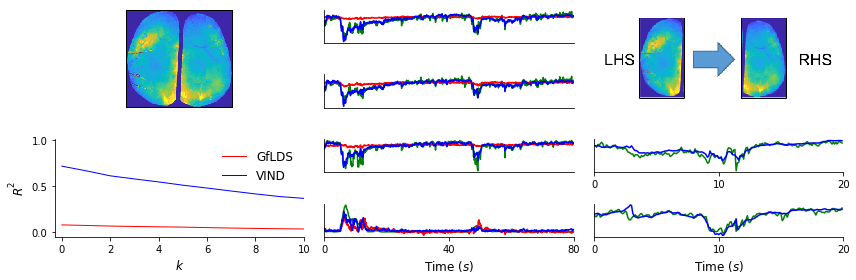

In [252]:
fig=plt.figure(figsize=(12,4))
gs1 = gridspec.GridSpec(4, 9)


# SUBPLOT 1
ax1 = plt.subplot(gs1[0:2, 0:3])

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.set_frame_on(False)
ax1.set_axis_off()
ax1.patch.set_visible(False)

plt.imshow(Widefield_frame)


# SUBPLOT 2
ax2 = plt.subplot(gs1[2:4, 0:3])

plt.xlabel('$k$', fontsize=label_fsize)
plt.ylabel(r'$R^2$', fontsize=label_fsize)
plt.ylim(-0.05, 1.01)
plt.xlim(-0.3, 10)

sns.despine(ax=ax2, top=True, right=True)
plt.plot(KStepGfLDS_Widefield, '-', c='r', linewidth=line_width)
plt.plot(KStepVIND_Widefield,'-', c='b', linewidth=line_width)
plt.legend(['GfLDS', 'VIND'], loc='best', fontsize=legend_fsize, frameon=False)


# SUBPLOT 3
for it,i in enumerate(YhatWidefield_Trials[1:]):
    ax3 = plt.subplot(gs1[it, 3:6])
    plt.xlim(YhatWidefield_times[0]/10, YhatWidefield_times[1]/10)
    plt.yticks([])
    plt.xticks([])
#     plt.xticks([0, 40, 80], ('0', '40', '80'))

    plt.plot(np.arange(YhatWidefield_times[0], YhatWidefield_times[1])/10, 
             YhatWidefield[0, YhatWidefield_times[0]:YhatWidefield_times[1], i], '-', color='g')
    plt.plot(np.arange(YhatWidefield_times[0],YhatWidefield_times[1])/10,
             YhatWidefield_GfLDS[0, YhatWidefield_times[0]:YhatWidefield_times[1], i], '-', color='r')
    plt.plot(np.arange(YhatWidefield_times[0],YhatWidefield_times[1])/10,
             YhatWidefield_VIND[0, YhatWidefield_times[0]:YhatWidefield_times[1], i], '-', color='b')
    sns.despine(ax=ax3, bottom=False)
plt.xticks([0, 40, 80], ('0', '40', '80'))
sns.despine(ax=ax3, bottom=False)
plt.xlabel('Time ($s$)', fontsize=label_fsize)
    

# SUBPLOT 4
ax4 = plt.subplot(gs1[0:2, 6:9])

ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)
ax4.set_frame_on(False)
ax4.set_axis_off()
ax4.patch.set_visible(False)

sns.despine(ax=ax4)
plt.imshow(Widefield_LR)


# SUBPLOT 5
for it,i in enumerate(YhatWidefieldLR_Trials[1:]):
    ax5 = plt.subplot(gs1[it+2, 6:9])

    plt.xlim(YhatWidefieldLR_times[0]/10, YhatWidefieldLR_times[1]/10)
    plt.yticks([])
    plt.xticks([0,10,20], ('0', '10', '20'))  
    plt.tight_layout()
    
    plt.plot(np.arange(YhatWidefieldLR_times[0], YhatWidefieldLR_times[1])/10,
             YhatWidefieldLR[YhatWidefieldLR_times[0]:YhatWidefieldLR_times[1], i], '-', color='g')
    plt.plot(np.arange(YhatWidefieldLR_times[0], YhatWidefieldLR_times[1])/10,
             YhatWidefieldLR_VIND[YhatWidefieldLR_times[0]:YhatWidefieldLR_times[1], i], '-', color='b')
    sns.despine(ax=ax5, right=True, top=True)
plt.xlabel('Time ($s$)', fontsize=label_fsize)
    

gs1.tight_layout(fig)
plt.savefig("Widefield Triplet")

# 4.- _ELECTROPHYSIOLOGY (ZIQIANG)_

In [306]:
from scipy import io

In [307]:
def load_data_all(datafile):
    import pickle
    with open(datafile, 'rb+') as f:
        datadict = pickle.load(f)
        Ytrain = datadict['Ytrain'].astype(np.float32)
        Yvalid = datadict['Yvalid'].astype(np.float32)
        train_valid = datadict['TargetTrain']
        target_valid = datadict['TargetValid']
    return np.concatenate((Ytrain, Yvalid), axis=0), np.concatenate((train_valid, target_valid), axis=0)

In [308]:
def explained_var_single(Yvalid, Ypreds):
    numUnit = Yvalid.shape[-1]
    Y = Yvalid.reshape(-1, numUnit)
    Y_ = Ypreds.reshape(-1, numUnit)
    err_ = Y_ - Y
    ev_ = (err_**2).sum(axis=0)/Y.var(axis=0)/Y.shape[0]
    return 1 - ev_.mean()

In [309]:
XDIM = 5
nFold = 3
Yvalid, target_valid = load_data_all('data_%02d.pkl'%(nFold))

_ = np.load('fit_dynamics.npz')
Ypreds_P = _['Ypreds_P']
Ypreds_PL = _['Ypreds_PL']

target_valid = target_valid.astype(np.bool)
timeSeries = np.arange(-3.1, 2+2/29.68, 2/29.68)
nNeurons = [14, 15, 3]
nfix = 4
const = 29.68/2

numDim = 16
numK = 20
ev_mat = io.loadmat('Session_17.mat')
GPFAErr = ev_mat['GPFAErr']/100
dat = np.load('EV_results.npz')
ev = dat['arr_0']
ev_linear = dat['arr_1']
nFold = 3
Yvalid_, target_valid_ = load_data_all('data_%02d.pkl'%(nFold))
target_valid_ = target_valid_.astype(np.bool)
Ypreds = Yvalid_.copy()

/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


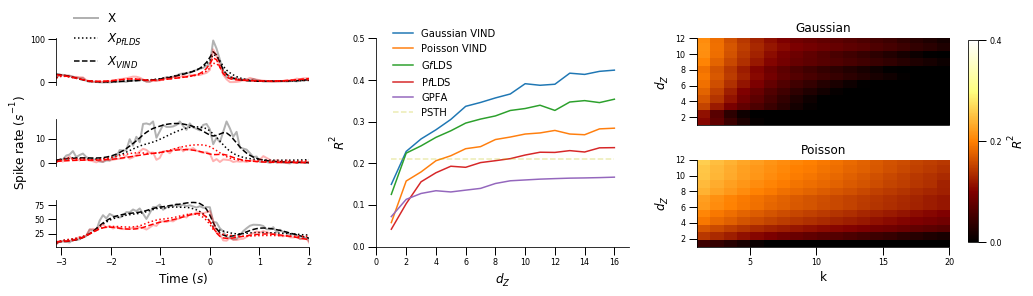

In [310]:
f = plt.figure(figsize=(13.5, 4.0), tight_layout=False)
gs1 = gridspec.GridSpec(6, 3)
ax_ = []


# SUBPLOT 1
for i, nNeuron in enumerate(nNeurons):
    ax = f.add_subplot(gs1[2*i:2*(i+1), 0])
    ax.plot(timeSeries, Yvalid[target_valid, :, nNeuron].T.mean(axis=1)*const,
            '-k', alpha=0.3, linewidth=2)
    ax.plot(timeSeries, Ypreds_PL[nfix, 0, target_valid, :, nNeuron].T.mean(axis=1)*const,
            ':k')
    ax.plot(timeSeries, Ypreds_P[nfix, 0, target_valid, :, nNeuron].T.mean(axis=1)*const,
            '--k')
    ax.plot(timeSeries, Yvalid[~target_valid, :, nNeuron].T.mean(axis=1)*const,
            '-r', alpha=0.3, linewidth=2)
    ax.plot(timeSeries, Ypreds_PL[nfix, 0, ~target_valid, :, nNeuron].T.mean(axis=1)*const, ':r')
    ax.plot(timeSeries, Ypreds_P[nfix, 0, ~target_valid, :, nNeuron].T.mean(axis=1)*const, '--r')    
    if i==0:
        ax.legend(loc="upper left", fontsize=label_fsize, bbox_to_anchor=(0, 1.2))
    ax.set_xlim([-3.1, 2.0])
    
    if i == 0:
        plt.legend(['X', r'$X_{PfLDS}$', r'$X_{VIND}$'], loc=(0.05, 0.2), fontsize=legend_fsize, frameon=False)
    if i != 2:
        ax.set_xticklabels('')
        plt.xticks([])
    if i == 1:
        ax.set_ylabel('Spike rate ($s^{-1}$)', fontsize=label_fsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_lsize)
    ax.tick_params(direction='out', length=tick_length, width=tick_width)
    ax_.append(ax)
    sns.despine(ax=ax, bottom=True)
sns.despine(ax=ax, bottom=False)
ax.set_xlabel('Time ($s$)', fontsize=label_fsize)
# gs1.tight_layout(f, rect=[0, 0, 0.33, 1])


# SUBPLOT 2
this_legend = ['Gaussian VIND', 'Poisson VIND', 'G$f$LDS', 'P$f$LDS', 'GPFA', 'PSTH']
Y_yes = Yvalid_[target_valid_, :, :].mean(axis=0)
Y_no = Yvalid_[~target_valid_, :, :].mean(axis=0)
Ypreds[target_valid_, :, :] = Y_yes
Ypreds[~target_valid_, :, :] = Y_no
err = explained_var_single(Yvalid_, Ypreds)
# gs2 = gridspec.GridSpec(1, 1)
ax = f.add_subplot(gs1[0:6, 1])
for idx, methods in enumerate(['Gaussian', 'Poisson']):
    ev_methods = ev[idx]
    ax.plot(np.arange(1, numDim+1), ev_methods[:, :, 3, 0].mean(axis=1).flatten(),
            '-o', markersize=0)#, label=methods+' VIND')
for idx, methods in enumerate(['Gaussian', 'Poisson']):
    ev_methods = ev_linear[idx]
    ax.plot(np.arange(1, numDim+1), ev_methods[:, :, 3, 0].mean(axis=1).flatten(),
            '-o', markersize=0)#, label=methods[0]+'fLDS')

ax.plot(np.arange(1, numDim+1), GPFAErr[:, :numDim].mean(axis=0).flatten(), '-o', markersize=0, label='GPFA')
ax.plot(np.array([1, numDim]), np.array([err, err]), '--k', alpha=0.3, color='y')#, label='PSTH')
ax.set_xlabel(r'$d_Z$', fontsize=label_fsize)
ax.set_ylabel(r'$R^2$', fontsize=label_fsize)
ax.set_xlim([0, numDim+1])
ax.set_ylim(ymin=0)
ax.tick_params(axis='both', which='major', labelsize=tick_lsize)
ax.tick_params(direction='out', length=tick_length, width=tick_width)
plt.legend(this_legend, loc=(0.05, 0.6), fontsize=legend_fsize-2, frameon=False)
plt.ylim(0, 0.5)

sns.despine(ax=ax)
# gs2.tight_layout(f, rect=[0.335, 0, 0.66, 1])


# SUBPLOT 3
# gs3 = gridspec.GridSpec(2, 1)
for idx, methods in enumerate(['Gaussian', 'Poisson']):
    ax = f.add_subplot(gs1[3*idx:3*(idx+1), 2])
    cf = ax.imshow(np.flipud(ev[idx][:,:,4,:].mean(axis=(1))), vmax=0.4, vmin=0, extent=[0, numK, 1, numDim],
                  cmap='afmhot', aspect='auto')  
#     ax.set_ylabel('Latent dim.' + methods, fontsize=font_size)
    ax.set_ylabel(r'$d_Z$', fontsize=label_fsize)
    ax.set_title(methods, fontsize=label_fsize)
    ax.set_ylim([1, 12])
    ax.set_yticks(np.arange(2, 14, 2))
    ax.set_xticks(np.arange(0))
    ax.set_xlim([1, 20])
    ax.tick_params(axis='both', which='major', labelsize=tick_lsize)
#     ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.tick_params(direction='out', length=tick_length, width=tick_width)
    sns.despine(ax=ax)
ax.set_xlabel('k', fontsize=label_fsize)  
ax.set_xticks(np.arange(5, 25, 5))
cbar_ax = f.add_axes([1.0, 0.2, 0.01, 0.7])
cbar = f.colorbar(cf, cax=cbar_ax, ticks=[0, 0.2, 0.4])
cbar.ax.set_ylabel(r'$R^2$', fontsize=label_fsize)
cbar.ax.tick_params(axis='both', which='major', labelsize=tick_lsize)
cbar.ax.tick_params(direction='out', length=tick_length, width=tick_width)

plt.tight_layout()
plt.show()

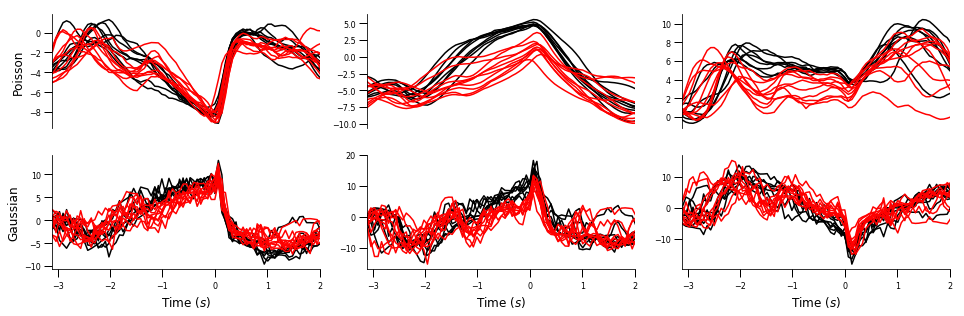

In [326]:
_ = np.load('fit_x_dynamics.npz')
X_P = _['X_P']
X_G = _['X_G']


timeSeries = np.arange(-3.1, 2+2/29.68, 2/29.68)
target_valid = target_valid.astype(np.bool)
Xpassed_NxTxd = X_P[4][-18:, :, :]
fig, ax = plt.subplots(2, 3, figsize=(13.5,4.5))
ax = ax.flatten()
plot_xDim = [0, 1, 3]
for i, i_ in enumerate(plot_xDim):
    ax[i].plot(timeSeries, -Xpassed_NxTxd[target_valid[-18:],:,i_].T, '-k')
    ax[i].plot(timeSeries, -Xpassed_NxTxd[~target_valid[-18:],:,i_].T, '-r')
    if i==0:
        ax[i].set_ylabel('Poisson', fontsize=label_fsize)

    ax[i].set_xlim([-3.1, 2.0])
    ax[i].set_xticklabels('')
    ax[i].set_xticks([])
    
    ax[i].tick_params(axis='both', which='major', labelsize=tick_lsize)
    ax[i].tick_params(direction='out', length=tick_length, width=tick_width)

    sns.despine(ax=ax[i], bottom=True)
    

Xpassed_NxTxd = X_G[4][-18:, :, :]
plot_xDim = [0, 1, 2]
for i, i_ in enumerate(plot_xDim):
    ax[i+3].plot(timeSeries, Xpassed_NxTxd[target_valid[-18:],:,i_].T, '-k')
    ax[i+3].plot(timeSeries, Xpassed_NxTxd[~target_valid[-18:],:,i_].T, '-r')
    if i==0:
        ax[i+3].set_ylabel('Gaussian', fontsize=label_fsize)
    ax[i+3].set_xlabel('Time ($s$)', fontsize=label_fsize)
    ax[i+3].set_xlim([-3.1, 2.0])
    ax[i+3].tick_params(axis='both', which='major', labelsize=tick_lsize)
    ax[i+3].tick_params(direction='out', length=tick_length, width=tick_width)
    sns.despine(ax=ax[i+3])

# fig.align_labels()
plt.tight_layout()
plt.show()